In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from simtk import openmm, unit
from simtk.openmm import app
from openmmtools.testsystems import WaterBox
from saltswap.swapper import Swapper

from openmmtools.integrators import GeodesicBAOABIntegrator
from saltswap.integrators import NCMCGeodesicBAOAB, NCMCMetpropolizedGeodesicBAOAB, GHMCIntegrator

# Testing the protocol work evaluations for SaltSwap NCMC integrators

The test system will be a box of water

In [2]:
size = 20.0*unit.angstrom     # The length of the edges of the water box.
temperature = 300*unit.kelvin
pressure = 1*unit.atmospheres
delta_chem = 317.0
wbox = WaterBox(box_edge=size, nonbondedMethod=app.PME, cutoff=9*unit.angstrom, ewaldErrorTolerance=1E-5)
wbox.system.addForce(openmm.MonteCarloBarostat(pressure, temperature))
nequil = 100

## Compound integrator with GHMC performing NCMC
### Using the CPU platform

In [3]:
platform_name = 'CPU'

In [4]:
compound_integrator = openmm.CompoundIntegrator()
# The integrator to perform the equilibrium dynamics
compound_integrator.addIntegrator(GeodesicBAOABIntegrator(temperature=temperature, K_r=2, collision_rate=5.0 / unit.picosecond, timestep=2.0 * unit.femtosecond))
# The NCMC propagator
compound_integrator.addIntegrator(GHMCIntegrator(temperature=temperature, collision_rate=5.0 / unit.picosecond, timestep=1.0 * unit.femtosecond, nsteps=1))

# Creating the context
platform = openmm.Platform.getPlatformByName(platform_name)
context = openmm.Context(wbox.system, compound_integrator, platform)
context.setPositions(wbox.positions)

# Running some equilibriun dynamics
compound_integrator.setCurrentIntegrator(0)
compound_integrator.step(nequil)

# Creating the class to perform the `saltswap` moves.
salinator = Swapper(system=wbox.system, topology=wbox.topology, temperature=temperature, delta_chem=delta_chem,
                integrator=compound_integrator, pressure=pressure, npert=50, nprop=1)

Comparing the calculated protocol work for adding salt with `getState` and the internal calculation with the custom integrator.

In [5]:
nrepeats = 100
internal_work = np.zeros(nrepeats)
external_work = np.zeros(nrepeats)
for i in range(nrepeats):
    in_wrk, ex_wrk = salinator.test_ncmc(context)
    internal_work[i] = in_wrk
    external_work[i] = ex_wrk

Plotting and getting the RMSD between the estimates:

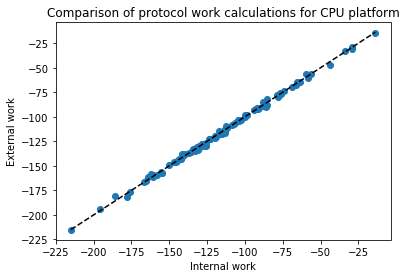

RMSD between work calculations = 1.69


In [6]:
x = y = np.linspace(internal_work.min(),internal_work.max())
plt.scatter(internal_work,external_work)
plt.plot(x,y, color='k', ls='--')
plt.title('Comparison of protocol work calculations for {0} platform'.format(platform_name))
plt.xlabel('Internal work')
plt.ylabel('External work')
plt.show()

print('RMSD between work calculations = {0:.2f}'.format(np.sqrt(((internal_work - external_work)**2).mean())))

### Using the Reference platform

In [7]:
platform_name = 'Reference'

In [8]:
compound_integrator = openmm.CompoundIntegrator()
# The integrator to perform the equilibrium dynamics
compound_integrator.addIntegrator(GeodesicBAOABIntegrator(temperature=temperature, K_r=2, collision_rate=5.0 / unit.picosecond, timestep=2.0 * unit.femtosecond))
# The NCMC propagator
compound_integrator.addIntegrator(GHMCIntegrator(temperature=temperature, collision_rate=5.0 / unit.picosecond, timestep=1.0 * unit.femtosecond, nsteps=1))

# Creating the context
platform = openmm.Platform.getPlatformByName(platform_name)
context = openmm.Context(wbox.system, compound_integrator, platform)
context.setPositions(wbox.positions)

# Running some equilibriun dynamics
compound_integrator.setCurrentIntegrator(0)
compound_integrator.step(nequil)

# Creating the class to perform the `saltswap` moves.
salinator = Swapper(system=wbox.system, topology=wbox.topology, temperature=temperature, delta_chem=delta_chem,
                integrator=compound_integrator, pressure=pressure, npert=50, nprop=1)


Comparing the calculated protocol work for adding salt with `getState` and the internal calculation with the custom integrator.

In [9]:
nrepeats = 100
internal_work = np.zeros(nrepeats)
external_work = np.zeros(nrepeats)
for i in range(nrepeats):
    in_wrk, ex_wrk = salinator.test_ncmc(context)
    internal_work[i] = in_wrk
    external_work[i] = ex_wrk

Plotting and getting the RMSD between the estimates:

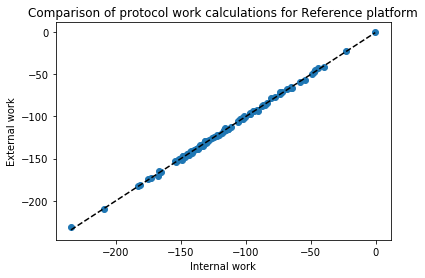

RMSD between work calculations = 1.28


In [10]:
x = y = np.linspace(internal_work.min(),internal_work.max())
plt.scatter(internal_work,external_work)
plt.plot(x,y, color='k', ls='--')
plt.title('Comparison of protocol work calculations for {0} platform'.format(platform_name))
plt.xlabel('Internal work')
plt.ylabel('External work')
plt.show()

print('RMSD between work calculations = {0:.2f}'.format(np.sqrt(((internal_work - external_work)**2).mean())))

In [11]:
print('RMSD = {0:.3f} kJ/mol'.format(np.sqrt(((internal_work - external_work)**2).mean())))

RMSD = 1.279 kJ/mol


## Compound integrator with gBAOAB performing NCMC

### Using the CPU platform

In [3]:
platform_name = 'CPU'

In [4]:
compound_integrator = openmm.CompoundIntegrator()
# The integrator to perform the equilibrium dynamics
compound_integrator.addIntegrator(GeodesicBAOABIntegrator(temperature=temperature, K_r=2, collision_rate=5.0 / unit.picosecond, timestep=2.0 * unit.femtosecond))
# The NCMC propagator
compound_integrator.addIntegrator(NCMCGeodesicBAOAB(temperature=temperature, collision_rate=5.0 / unit.picosecond, timestep=1.0 * unit.femtosecond))

# Creating the context
platform = openmm.Platform.getPlatformByName(platform_name)
context = openmm.Context(wbox.system, compound_integrator, platform)
context.setPositions(wbox.positions)

# Running some equilibriun dynamics
compound_integrator.setCurrentIntegrator(0)
compound_integrator.step(nequil)

# Creating the class to perform the `saltswap` moves.
salinator = Swapper(system=wbox.system, topology=wbox.topology, temperature=temperature, delta_chem=delta_chem,
                integrator=compound_integrator, pressure=pressure, npert=50, nprop=1)

Comparing the calculated protocol work for adding salt with `getState` and the internal calculation with the custom integrator.

In [5]:
nrepeats = 100
internal_work = np.zeros(nrepeats)
external_work = np.zeros(nrepeats)
for i in range(nrepeats):
    in_wrk, ex_wrk = salinator.test_ncmc(context)
    internal_work[i] = in_wrk
    external_work[i] = ex_wrk

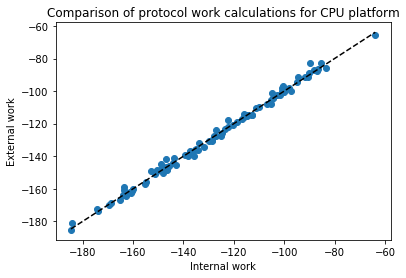

RMSD between work calculations = 1.90


In [6]:
x = y = np.linspace(internal_work.min(),internal_work.max())
plt.scatter(internal_work,external_work)
plt.plot(x,y, color='k', ls='--')
plt.title('Comparison of protocol work calculations for {0} platform'.format(platform_name))
plt.xlabel('Internal work')
plt.ylabel('External work')
plt.show()

print('RMSD between work calculations = {0:.2f}'.format(np.sqrt(((internal_work - external_work)**2).mean())))

### Using the Reference platform

In [3]:
platform_name = 'Reference'

In [4]:
compound_integrator = openmm.CompoundIntegrator()
# The integrator to perform the equilibrium dynamics
compound_integrator.addIntegrator(GeodesicBAOABIntegrator(temperature=temperature, K_r=2, collision_rate=5.0 / unit.picosecond, timestep=2.0 * unit.femtosecond))
# The NCMC propagator
compound_integrator.addIntegrator(NCMCGeodesicBAOAB(temperature=temperature, collision_rate=5.0 / unit.picosecond, timestep=1.0 * unit.femtosecond))

# Creating the context
platform = openmm.Platform.getPlatformByName(platform_name)
context = openmm.Context(wbox.system, compound_integrator, platform)
context.setPositions(wbox.positions)

# Running some equilibriun dynamics
compound_integrator.setCurrentIntegrator(0)
compound_integrator.step(nequil)

# Creating the class to perform the `saltswap` moves.
salinator = Swapper(system=wbox.system, topology=wbox.topology, temperature=temperature, delta_chem=delta_chem,
                integrator=compound_integrator, pressure=pressure, npert=50, nprop=1)

Comparing the calculated protocol work for adding salt with `getState` and the internal calculation with the custom integrator.

In [5]:
nrepeats = 100
internal_work = np.zeros(nrepeats)
external_work = np.zeros(nrepeats)
for i in range(nrepeats):
    in_wrk, ex_wrk = salinator.test_ncmc(context)
    internal_work[i] = in_wrk
    external_work[i] = ex_wrk

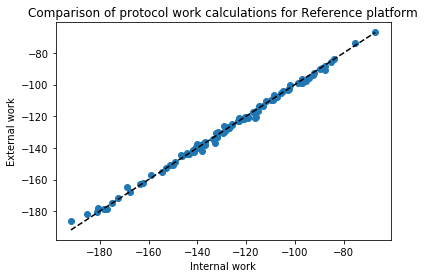

RMSD between work calculations = 1.62


In [6]:
x = y = np.linspace(internal_work.min(),internal_work.max())
plt.scatter(internal_work,external_work)
plt.plot(x,y, color='k', ls='--')
plt.title('Comparison of protocol work calculations for {0} platform'.format(platform_name))
plt.xlabel('Internal work')
plt.ylabel('External work')
plt.show()

print('RMSD between work calculations = {0:.2f}'.format(np.sqrt(((internal_work - external_work)**2).mean())))

## Compound integrator with metropolized gBAOAB performing NCMC

In [9]:
compound_integrator = openmm.CompoundIntegrator()
# The integrator to perform the equilibrium dynamics
compound_integrator.addIntegrator(GeodesicBAOABIntegrator(temperature=temperature, K_r=2, collision_rate=5.0 / unit.picosecond, timestep=2.0 * unit.femtosecond))
# The NCMC propagator
compound_integrator.addIntegrator(NCMCMetpropolizedGeodesicBAOAB(temperature=temperature, collision_rate=5.0 / unit.picosecond, timestep=1.0 * unit.femtosecond))

# Creating the context
context = openmm.Context(wbox.system, compound_integrator)
context.setPositions(wbox.positions)

# Running some equilibriun dynamics
compound_integrator.setCurrentIntegrator(0)
compound_integrator.step(nequil)

# Creating the class to perform the `saltswap` moves.
salinator = Swapper(system=wbox.system, topology=wbox.topology, temperature=temperature, delta_chem=delta_chem,
                integrator=compound_integrator, pressure=pressure, npert=50, nprop=1)

In [10]:
nrepeats = 100
internal_work = np.zeros(nrepeats)
external_work = np.zeros(nrepeats)
for i in range(nrepeats):
    in_wrk, ex_wrk = salinator.test_ncmc(context)
    internal_work[i] = in_wrk
    external_work[i] = ex_wrk

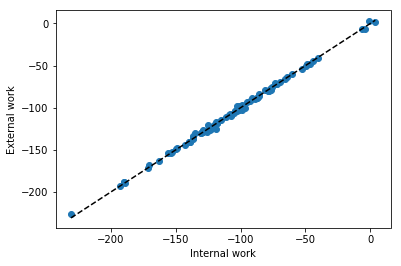

In [11]:
x = y = np.linspace(internal_work.min(),internal_work.max())
plt.scatter(internal_work,external_work)
plt.plot(x,y, color='k', ls='--')
plt.title('Comparison of protocol work calculations for {0} platform'.format(platform_name))
plt.xlabel('Internal work')
plt.ylabel('External work')
plt.show()

print('RMSD between work calculations = {0:.2f}'.format(np.sqrt(((internal_work - external_work)**2).mean())))

In [10]:
np.sqrt(((internal_work - external_work)**2).mean())

1.1683449428158217